
 - https://github.com/ibdafna/learning_jupyter_with_bloomberg : see notebook 5 and 6 (4 for ipywidgets) 
  - video 5 : https://www.youtube.com/watch?v=VT7XX7hR5Do
 - https://github.com/ChakriCherukuri/mlviz : ML examples
  - video : https://www.youtube.com/watch?v=zZ1y7cuT6_0
 -  
 - bqplot tutorial :


Excel to jupyterlab jupytercon2020 : https://www.youtube.com/watch?v=hO6F2WJRf-U
 -  

 - https://github.com/dmadeka/SciPy2017
 - https://github.com/Emaasit/learning-ipywidgets : tutorials on widgets
 
Image handling
 - https://github.com/bqplot/bqplot/blob/master/examples/Marks/Object%20Model/Image.ipynb
 - https://github.com/Who8MyLunch/Numpy_Image_Widget
 - https://ipycanvas.readthedocs.io/en/latest/drawing_images.html
 - https://github.com/jupyter-widgets/ipywidgets/issues/1532
 - https://github.com/jupyter-widgets/ipywidgets/blob/master/docs/source/examples/Image%20Processing.ipynb

In [1]:
import bqplot as bq
import numpy as np
import ipywidgets as widgets

In [1]:
def calcSlope(num_points, slope):
    a = np.linspace(0, 9, num_points)
    b = a * slope

    line1.x = a
    line1.y = b


def calcXY(num_points, randNum):
    x = np.linspace(3, 9, num_points)
    y = x

    # add randomness to scatter
    x = np.random.uniform(low=1-randNum/100, high=1 +
                          randNum/100, size=(len(x))) * x
    y = np.random.uniform(low=1-randNum/100, high=1 +
                          randNum/100, size=(len(y))) * y

    # format & plot the figure
    x_sc.min = x.min()
    x_sc.max = x.max() + 1

    scat.x = x
    scat.y = y


def rand_int(rand):
    calcXY(num_i.children[0].value, rand)


def num_points_int(num_points):
    calcXY(num_points, rand_i.children[0].value)
    calcSlope(num_points, slope_i.children[0].value)


def slope_int(slope):
    calcSlope(num_i.children[0].value, slope)


rand_i = widgets.interactive(rand_int,
                             rand=widgets.FloatSlider(
                                 value=3,
                                 min=0,
                                 max=50,
                                 step=3,
                                 description='Randomness:', num_points=(10, 50, 5)
                             )
                             )


num_i = widgets.interactive(num_points_int,
                            num_points=widgets.IntSlider(
                                value=20,
                                min=10,
                                max=50,
                                step=5,
                                description='Number of points:'
                            )
                            )


slope_i = widgets.interactive(slope_int,
                              slope=widgets.FloatSlider(
                                  value=1,
                                  min=-1,
                                  max=5,
                                  step=0.1,
                                  description='Slope'
                              )
                              )


# Create the initial bqplot figure
x_sc = bq.LinearScale()
ax_x = bq.Axis(label='X', scale=x_sc, grid_lines='solid', tick_format='0f')
ax_y = bq.Axis(label='Y', scale=x_sc,
               orientation='vertical', tick_format='0.2f')

line1 = bq.Lines(scales={'x': x_sc, 'y': x_sc}, colors=[
                 'blue'], display_legend=False, labels=['y1'], stroke_width=1.0)
scat = bq.Scatter(scales={'x': x_sc, 'y': x_sc}, colors=[
                  'red'], display_legend=False, labels=['y1'], stroke_width=1.0)


calcSlope(num_i.children[0].value, slope_i.children[0].value)
calcXY(num_i.children[0].value, rand_i.children[0].value)

m_fig = dict(left=100, top=50, bottom=50, right=100)
fig = bq.Figure(axes=[ax_x, ax_y], marks=[line1, scat],
                fig_margin=m_fig, animation_duration=1000)

widgets.VBox([rand_i, num_i, slope_i, fig])

# Datasaurus

In [6]:
import pandas as pd
import ipywidgets as widgets
import bqplot.pyplot as plt

table_tmpl = \
    """
<table>
<caption align="center">Stats</caption>
<tr>
    <td style="font-weight: bold">X Mean</td>
    <td align="right">{x_mean:.2f}</td>
</tr>
<tr>
    <td style="font-weight: bold">Y Mean</td>
    <td align="right">{y_mean:.2f}</td>
</tr>
<tr>
    <td style="font-weight: bold">X Std</td>
    <td align="right">{x_std:.2f}</td>
</tr>
<tr>
    <td style="font-weight: bold">Y Std</td>
    <td align="right">{y_std:.2f}</td>
</tr>
<tr>
    <td style="font-weight: bold">Correlation</td>
    <td align="right">{corr:.2f}</td>
</tr>
</table>
"""
datasaurus_data = pd.read_csv('data/datasaurus.csv', delimiter=';')

# group by dataset and compute first two moments and corr
dataset_gby = datasaurus_data.groupby('dataset')

# basic stats for all datasets: mean and std
stats = dataset_gby.agg(['mean', 'std'])

# correlation between x and y for all datasets
corr = dataset_gby.apply(lambda g: g['x'].corr(g['y']))

# stats for all datasets
stats_df = pd.concat([stats, corr], axis=1)
stats_df.columns = ['x_mean', 'x_std', 'y_mean', 'y_std', 'corr']

type_dd = widgets.Dropdown(description='Dataset',
                           options=list(dataset_gby.groups.keys()))

stats_table = widgets.HTML()
stats_table.layout.width = '300px'

scat_fig = plt.figure(animation_duration=1000, preserve_aspect=True)
scat_fig.layout.width = '700px'
scat_fig.layout.height = '600px'
scat = plt.scatter([], [], colors=['deepskyblue'],
                   default_size=40, stroke='black')
plt.xlabel('X')
plt.ylabel('Y')

# historgrams of X and Y
hist_layout = widgets.Layout(height='300px', width='400px')
hist_title_tmpl = 'Histogram of {dataset}[{var}]'
x_hist_fig = plt.figure(layout=hist_layout)
x_hist = plt.hist([], colors=['orangered'], bins=30)

y_hist_fig = plt.figure(layout=hist_layout)
y_hist = plt.hist([], colors=['lightgreen'], bins=30)

for axis in x_hist_fig.axes:
    axis.grid_lines = 'none'

for axis in y_hist_fig.axes:
    axis.grid_lines = 'none'

# create a callback to update the scatter and the stats table


def update(*args):
    dataset = type_dd.value
    scat_fig.title = dataset
    with scat.hold_sync():
        x, y = (dataset_gby
                .get_group(dataset)[['x', 'y']]
                .values.T)
        scat.x, scat.y = x, y

    x_hist.sample = x
    x_hist_fig.title = hist_title_tmpl.format(dataset=dataset,
                                              var='x')
    y_hist.sample = y
    y_hist_fig.title = hist_title_tmpl.format(dataset=dataset,
                                              var='y')

    stats_dict = stats_df.loc[dataset].to_dict()
    stats_table.value = table_tmpl.format(**stats_dict)


type_dd.observe(update, 'value')

# invoke the callback on startup
update(None)

histograms = widgets.VBox([x_hist_fig, y_hist_fig])
widgets.VBox([type_dd, widgets.HBox([scat_fig, histograms, stats_table])],
             layout=widgets.Layout(height="100%"))

# histograms.layout.overflow = 'visible'

In [16]:
import matplotlib.pyplot as mplt


def set_style(style='blackviz'):
    mplt.rc('figure', facecolor='0.065', autolayout=False, dpi=120)
    mplt.rc('axes', facecolor='0.125', edgecolor='w', grid=True, labelcolor='lightgrey', labelsize='large',
            prop_cycle=mplt.cycler('color', ['deepskyblue', 'orangered', 'green', 'yellow', 'mintcream', 'magenta', 'darkorange']))

    mplt.rc('xtick', color='w')
    mplt.rc('ytick', color='w')
    mplt.rc('grid', color='w', linestyle='-', alpha=0.25)
    mplt.rc('font', size=12)
    mplt.rc('text', color='lightgrey')
    mplt.rc('lines', linewidth=2)
    mplt.rc('figure', figsize='10, 8', titlesize='x-large')

In [17]:
import bqplot as bqp
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as mplt
import bqplot.pyplot as plt
# from utils.plot_utils import set_style # Helper function for nicer looking plots.

In [18]:
# Styling for dark background matplotlib charts
set_style()

In [19]:
# Some fake data
np.random.seed(0)
x_data = np.arange(1, 21, 1)
y_fake_line = 100 + np.random.normal(0, 1, 20).cumsum()
y_fake_dots = np.random.normal(1, 10, 20)

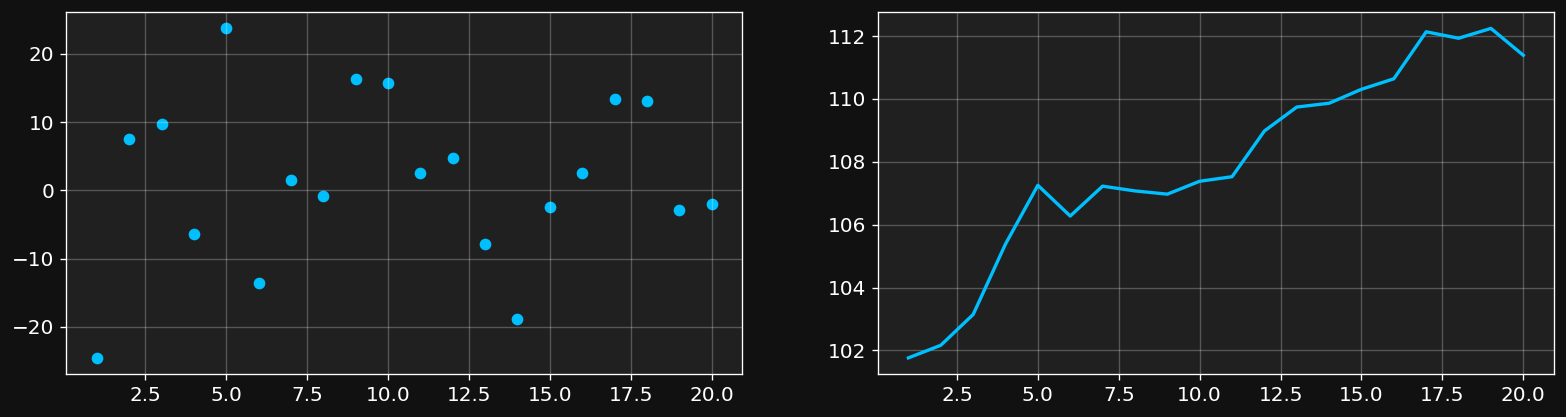

In [20]:
# Using matplotlib
fig, axes = mplt.subplots(1, 2, figsize=(16, 4))
axes[0].scatter(x_data, y_fake_dots)
axes[1].plot(x_data, y_fake_line);

In [22]:
# Using bqplot
plt.figure()
plt.plot(x_data, y_fake_line)
plt.show()

In [23]:
def generate_fake_stock_price(steps):
    return (np.arange(steps), 100 + np.random.normal(0, 1, steps).cumsum())

In [24]:
# Data
x_data, y_data = generate_fake_stock_price(100)

In [25]:
plt.figure()
plt.plot(x_data, y_data)
plt.show()

In [26]:
https://www.youtube.com/watch?v=VT7XX7hR5Do

Figure(axes=[Axis(label='Index', scale=LinearScale()), Axis(label='y-value', orientation='vertical', scale=Lin…

In [36]:
line.x, line.y = generate_fake_stock_price(100)

In [34]:
fig.animation_duration = 1000  # transition animation in milliseconds

In [37]:
fig.title = 'A new title for my chart'

In [38]:
line.colors = ['limegreen']

In [39]:
ax_x.label_location = 'end'
ax_y.label_location = 'start'

In [27]:
line.x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [28]:
line.y

array([ 98.95144703,  97.5314291 ,  95.82515891,  97.7759343 ,
        97.26628212,  96.82820782,  95.57541246,  96.35290281,
        94.73900497,  94.52626469,  93.63079813,  94.01770062,
        93.50689549,  92.3262633 ,  92.29808107,  92.72641294,
        92.79293017,  93.09540206,  92.46107997,  92.0983388 ,
        91.42587836,  91.0663252 ,  90.25317891,  88.52689631,
        88.70432245,  88.30254152,  86.67234317,  87.13512543,
        86.22782706,  86.27977246,  87.00886302,  87.13784593,
        88.27724661,  87.04242079,  87.44476244,  86.75995234,
        85.8891552 ,  85.31030553,  84.998753  ,  85.05491834,
        83.8897685 ,  84.79059499,  85.25625743,  83.72001374,
        85.20826593,  87.10415511,  88.28293468,  88.10300985,
        87.03225722,  88.08670895,  87.683532  ,  88.90597707,
        89.11425205,  90.09089109,  90.44725749,  91.15383065,
        91.16433067,  92.95020117,  93.07711326,  93.47910262,
        95.36225332,  94.01449426,  92.74400926,  93.71

In [40]:


# Callback function for the button
def change_line(click=None):
    line.x, line.y = generate_fake_stock_price(100)
    line.colors = [bqp.CATEGORY10[np.random.randint(len(bqp.CATEGORY10))]]
    fig.title = "Line chart with color {}".format(line.colors)


btn = widgets.Button(description='Change line!', button_style='warning')
btn.on_click(change_line)
widgets.VBox([btn, fig])

In [41]:
line.display_legend = False

In [42]:
fig = plt.figure()
line = plt.plot(np.arange(10), np.arange(10), colors=['hotpink', 'orange'])
fig

Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top':…

In [43]:
# Set the grid lines of axes to dashed
xax, yax = plt.axes()['x'], plt.axes()['y']

xax.grid_lines = 'dashed'
yax.grid_lines = 'dashed'

In [44]:
# Change the side of the axis
yax.side = 'right'
xax.side = 'top'

In [45]:
# change the orientation of axes
yax.orientation = 'horizontal'
xax.orientation = 'vertical'

In [46]:
# Change the color of the axis
with xax.hold_sync():
    xax.color = 'orangered'
    xax.label_color = 'orangered'

In [47]:
# Change the grid colors
xax.grid_color = 'red'

In [48]:
x = np.arange(100)
y = np.cumsum(np.random.randn(2, 100), axis=1)  # two random walks

axes_options = {'x': {'label': 'x'}, 'y': {'label': 'y'}}
fig = plt.figure(animation_duration=1000)
lines = plt.plot(x=x, y=y, colors=[
                 'darkorange', 'dodgerblue'], axes_options=axes_options)
fig

Figure(animation_duration=1000, axes=[Axis(label='x', scale=LinearScale()), Axis(label='y', orientation='verti…

In [51]:
# Update data of the line mark
lines.y = np.cumsum(np.random.randn(2, 100), axis=1)

In [52]:
x = np.arange(100)
y1, y2 = np.random.randn(2, 100).cumsum(axis=1)

fig = plt.figure()
plt.scales(scales={'x': bqp.LinearScale(min=10, max=90)})
line1 = plt.plot(x, y1, 'm', labels=['Clipped Line'], display_legend=True)
line2 = plt.plot(x, y2, 'y', apply_clip=False, labels=[
                 'Non clipped line'], display_legend=True)
fig

Figure(axes=[Axis(scale=LinearScale(max=90.0, min=10.0)), Axis(orientation='vertical', scale=LinearScale())], …

In [53]:
# Scales for x and y axes
sc_x = bqp.LinearScale()
sc_y = bqp.LinearScale()

# Tooltip widget - new addition
ttip = bqp.Tooltip(fields=['x', 'y'], formats=['', '.2f'])

# Scatter mark
scatt = bqp.Scatter(x=x_data[:20], y=y_fake_dots, scales={'x': sc_x, 'y': sc_y},  labels=['Random scatter data'],
                    colors=bqp.CATEGORY10, display_legend=True, tooltip=ttip)

# Axes for both x and y
ax_x = bqp.Axis(scale=sc_x, label='X Axis')
ax_y = bqp.Axis(scale=sc_y, orientation='vertical',
                tick_format='0.0f', label="Y-Axis")

# Figure object
fig = bqp.Figure(marks=[scatt], axes=[ax_x, ax_y],
                 title='Scatter Chart', animation_duration=1000)
fig

Figure(animation_duration=1000, axes=[Axis(label='X Axis', scale=LinearScale()), Axis(label='Y-Axis', orientat…

In [54]:
regression = np.polyfit(x_data[:20], y_fake_dots, deg=1)
polyfit = np.polyval(regression, x_data)

# Creating a line mark
ols_line = bqp.Lines(x=x_data[:20], y=polyfit, scales={
                     'x': sc_x, 'y': sc_y}, colors=['pink'])

# Adding the regression line
fig.marks = [scatt, ols_line]

In [55]:
scatt.enable_move = True

In [56]:
# Some widgets
slider_scatt = widgets.IntSlider(value=2, min=1, max=5)

# Callback for linear regression degree of freedom change


def scatter_callback(click=None):
    # New regression
    regression = np.polyfit(scatt.x, scatt.y, deg=slider_scatt.value)
    polyfit = np.polyval(regression, scatt.x)

    with ols_line.hold_sync():
        ols_line.x = scatt.x
        ols_line.y = polyfit


# Listening for change events
scatt.observe(scatter_callback, names=['x'])
scatt.observe(scatter_callback, names=['y'])
slider_scatt.observe(scatter_callback, 'value')

widgets.VBox([slider_scatt, fig])

In [57]:
ols_line.y

array([-0.67403993, -0.36909123, -0.06414253,  0.24080617,  0.54575487,
        0.54575487,  1.15565227,  1.46060097,  1.76554968,  2.07049838,
        2.37544708,  2.68039578,  2.98534448,  3.29029318,  3.59524188,
        3.90019058,  4.20513928,  4.51008798,  4.81503668,  5.11998538])

In [58]:
fig = plt.figure(animation_duration=1000)
x, y = np.random.rand(2, 20)
scatt = plt.scatter(x, y, colors=['yellowgreen'], axes_options=axes_options)
fig

Figure(animation_duration=1000, axes=[Axis(label='x', scale=LinearScale()), Axis(label='y', orientation='verti…

In [61]:
scatt.x = np.random.rand(20) * 10
scatt.y = np.random.rand(20)

In [62]:
# Some data
size = 100
np.random.seed(0)

x_data = range(size)
y_data = np.random.randn(size)
y_data_2 = np.random.randn(size)
y_data_3 = np.cumsum(np.random.randn(size) * 100.)

In [63]:
x_ord = bqp.OrdinalScale()
y_sc = bqp.LinearScale()

bar = bqp.Bars(x=np.arange(1, 11), y=np.arange(1, 11), scales={
               'x': x_ord, 'y': y_sc}, colors=bqp.CATEGORY10)
ax_x = bqp.Axis(scale=x_ord)
ax_y = bqp.Axis(scale=y_sc, tick_format='0.2f', orientation='vertical')

bqp.Figure(marks=[bar], axes=[ax_x, ax_y], padding_x=0.025,
           padding_y=0.025, animation_duration=1000)

Figure(animation_duration=1000, axes=[Axis(scale=OrdinalScale()), Axis(orientation='vertical', scale=LinearSca…

In [65]:
# Changing the orientation
bar.orientation = 'horizontal'

In [66]:
# Adding labels
bar.label_display = True
bar.label_display_format = '.1f'
bar.label_font_style = {'fill': 'white', 'font-size': '10px'}

In [67]:
# Changing opacities
bar.opacities = [0.5, 0.2]

In [68]:
# Updating data
bar.orientation = 'vertical'
bar.opacities = [1]
bar.y = np.arange(-5, 5)

In [69]:


# Import to process datetime data
from datetime import datetime as py_dtime

# Data
price_data = pd.DataFrame(np.cumsum(np.random.randn(150, 2).dot([[0.5, 0.4], [0.4, 1.0]]), axis=0) + 100,
                          columns=['Security 1', 'Security 2'],
                          index=pd.date_range(start='01-01-2007', periods=150))

symbol = 'Security 1'
symbol2 = 'Security 2'
date_fmt = '%m-%d-%Y'
sec2_data = price_data[symbol2].values
dates = price_data.index.values
dates_actual = price_data.index.values
prices = price_data[symbol].values


# Chart
xs_hd = bqp.DateScale(min=np.datetime64(py_dtime(2007, 1, 1)))
ys_hd = bqp.LinearScale()
line_hd = bqp.Lines(x=dates_actual, y=sec2_data, scales={
                    'x': xs_hd, 'y': ys_hd}, colors=['darkseagreen'])

handdraw = bqp.interacts.HandDraw(lines=line_hd)
xax = bqp.Axis(scale=xs_hd, label='Date', grid_lines='none')
yax = bqp.Axis(scale=ys_hd, label='Price',
               orientation='vertical', grid_lines='none')

bqp.Figure(marks=[line_hd], axes=[xax, yax], interaction=handdraw)

Figure(axes=[Axis(grid_lines='none', label='Date', scale=DateScale(min=datetime.datetime(2007, 1, 1, 0, 0))), …

In [70]:
line_hd.y

array([101.13551994, 100.40807612, 100.21390956,  98.33348867,
        98.45142449,  99.47568767,  98.2942796 ,  76.4608051 ,
        72.68809185,  72.68809185,  72.9513044 ,  72.9513044 ,
        72.9513044 ,  73.47772951,  73.47772951,  73.47772951,
        73.47772951,  73.47772951,  73.47772951,  74.17962964,
        74.17962964,  74.17962964,  74.17962964,  74.17962964,
        74.17962964,  74.17962964,  74.17962964,  74.70605475,
        74.70605475,  74.70605475,  74.70605475,  74.70605475,
        74.70605475,  74.70605475,  74.70605475,  74.88152978,
        74.88152978,  74.88152978,  74.88152978,  74.88152978,
        74.88152978,  74.88152978,  74.88152978,  74.88152978,
        74.88152978,  74.88152978,  74.88152978,  74.88152978,
        74.88152978,  74.88152978,  74.88152978,  74.88152978,
        74.88152978,  74.88152978,  74.88152978,  74.88152978,
        74.88152978,  74.88152978,  74.88152978,  74.88152978,
        74.88152978,  74.4428422 ,  74.4428422 ,  74.44

In [71]:
# Callback for the selector
def brush_callback(change):
    if(not br_intsel.brushing):
        html_readout.value = "<h1 style='color:linen'>Selected indices: {}-{}</h1>".format(
            br_intsel.selected[0], br_intsel.selected[1])


# Chart
x_ord = bqp.OrdinalScale()
y_sc = bqp.LinearScale()

bar = bqp.Bars(x=x_data, y=[y_data[:20], y_data_2[:20]],
               scales={'x': x_ord, 'y': y_sc}, padding=0.2,
               colors=bqp.CATEGORY10)

br_intsel = bqp.interacts.BrushIntervalSelector(scale=x_ord, marks=[bar])
br_intsel.observe(brush_callback, names=['selected'])
br_intsel.observe(brush_callback, names=['brushing'])

ax_x = bqp.Axis(scale=x_ord)
ax_y = bqp.Axis(scale=y_sc, orientation='vertical', tick_format='0.2f')

fig = bqp.Figure(marks=[bar], axes=[ax_x, ax_y], interaction=br_intsel)

# Some widgetry
html_readout = widgets.HTML(
    value="<h1 style='color:linen'>Selected indices will be displayed here</h1>")
widgets.VBox([html_readout, fig])

In [72]:
# color_mode: {'auto', 'group', 'element', 'no_group'}
bar.color_mode = 'group'

In [73]:
# color_mode: {'auto', 'group', 'element', 'no_group'}
bar.color_mode = 'element'

In [74]:
# color_mode: {'auto', 'group', 'element', 'no_group'}
bar.color_mode = 'no_group'

In [75]:
# Data
np.random.seed(0)
n = 100
x_data = range(n)
y_data = np.cumsum(np.random.randn(n) * 100.0)

In [76]:
def create_fig(color_scale, color_data, fig_margin=None):
    # allow some margin on right for color bar
    if fig_margin is None:
        fig_margin = dict(top=50, bottom=70, left=50, right=100)
    fig = plt.figure(title='Up and Down', fig_margin=fig_margin)

    # setup color scale
    plt.scales(scales={'color': color_scale})

    # show color bar on right
    axes_options = {'color': {'orientation': 'vertical', 'side': 'right'}}
    scat = plt.scatter(x_data, y_data, color=color_data,
                       stroke='black', axes_options=axes_options)
    return fig

In [77]:
fig = create_fig(bqp.ColorScale(), y_data)
fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(), side='right'), Axis(scale=LinearScale()), A…

In [78]:
# We can change the domain by adding constraints on 'min'/'max'
color_scale = fig.marks[0].scales['color']
color_scale.min = 0

In [79]:
color_scale.reverse = True

In [80]:
color_scale.min = None
color_scale.mid = 0

In [81]:
fig_margin = dict(top=50, bottom=70, left=50, right=200)
date_col_sc = bqp.DateColorScale()
dates = pd.date_range(start='2015-01-01', periods=n)
create_fig(date_col_sc, dates, fig_margin=fig_margin)

Figure(axes=[ColorAxis(orientation='vertical', scale=DateColorScale(), side='right'), Axis(scale=LinearScale()…

In [82]:
import datetime

In [83]:
# Changing the domain
date_col_sc.min = datetime.date(2015, 2, 28)

In [84]:
date_col_sc.scheme = 'Spectral'

In [85]:
import numpy as np

import ipywidgets as w
import bqplot.pyplot as plt
from bqplot import *

def squared_exponential(x1, x2, sigma=1., l=1.):
    z = (x1 - x2[:, np.newaxis]) / l
    return sigma**2 * np.exp(-.5 * z ** 2)

def gp_regression(X_train, y_train, X_test,
                  kernel=squared_exponential,
                  sigma_noise=.1,
                  params=dict(sigma=1., l=1.)):
    # compute the kernel matrices for train, train_test, test combinations
    K = kernel(X_train, X_train, **params)
    K_s = kernel(X_train, X_test, **params)
    K_ss = kernel(X_test, X_test, **params)
    
    n, p = len(X_train), len(X_test)
    
    # compute the posterior mean and cov
    mu_s = np.dot(K_s, np.linalg.solve(K + sigma_noise**2 * np.eye(n), y_train))
    cov_s = K_ss - np.dot(K_s, np.linalg.solve(K + sigma_noise**2 * np.eye(n), K_s.T))
    
    # prior and posterior moments
    mu_prior, cov_prior = np.zeros(p), K_ss
    mu_post, cov_post = mu_s, cov_s + sigma_noise**2
    
    return dict(prior=(mu_prior, cov_prior), 
                posterior=(mu_post, cov_post))

kernel = squared_exponential
params = dict(sigma=1., l=1.)

X_test = np.arange(-5, 5, .05)
p = len(X_test)
K_ss = kernel(X_test, X_test, **params)
mu_prior, cov_prior = np.zeros(p), K_ss

N = 5
f_priors = np.random.multivariate_normal(mu_prior, cov_prior, N)

fig_margin=dict(top=60, bottom=40, left=50, right=0)

fig = plt.figure(title='Gaussian Process Regression', 
                 layout=w.Layout(width='1000px', height='600px'),
                 fig_margin=fig_margin)

plt.scales(scales={'x': LinearScale(min=-5, max=5),
                   'y': LinearScale(min=-5, max=5)})

train_scat = plt.scatter([], [], colors=['magenta'], 
                         enable_move=True,
                         interactions={'click': 'add'},
                         marker_size=1, marker='square')

prior_lines = plt.plot(X_test, f_priors, stroke_width=1, colors=['#ccc'])
posterior_lines = plt.plot(X_test, [], stroke_width=1)

mean_line = plt.plot(X_test, [], 'm')
std_bands = plt.plot(X_test, [],
                     fill='between',
                     fill_colors=['orange'],
                     fill_opacities=[.2], stroke_width=0)
plt.xlabel('X')
plt.ylabel('Y')

# reset btn
reset_button = w.Button(description='Reset Points', button_style='success')
reset_button.layout.margin = '20px 0px 0px 70px'

# controls for the plot
f_priors_cb = w.Checkbox(description='Display 5 Priors?')
f_posteriors_cb = w.Checkbox(description='Display 5 Posteriors?')
std_bands_cb = w.Checkbox(description='Display Std Bands?')
check_boxes = [f_priors_cb, f_posteriors_cb, std_bands_cb]

label = w.Label('*Click on the figure to add training samples')
controls = w.VBox(check_boxes + [reset_button, label])

# link widgets
_ = w.jslink((f_priors_cb, 'value'), (prior_lines, 'visible'))
_ = w.jslink((f_posteriors_cb, 'value'), (posterior_lines, 'visible'))
_ = w.jslink((std_bands_cb, 'value'), (std_bands, 'visible'))

def update_reg_line(change):
    global mu_post, sig_post
    
    fig.animation_duration = 0
    X_train = train_scat.x
    y_train = train_scat.y
    
    fig.animation_duration = 1000

    gp_res = gp_regression(X_train, y_train, X_test, sigma_noise=0.04)
    mu_post, cov_post = gp_res['posterior']
    
    # simulate N samples from the posterior distribution
    posterior_lines.y = np.random.multivariate_normal(mu_post, cov_post, N)
    sig_post = np.sqrt(np.diag(cov_post))

    # update the regression line to the mean of the posterior distribution
    mean_line.y = mu_post
    
    # update the std bands to +/- 2 sigmas from the posterior mean
    std_bands.y = [mu_post - 2 * sig_post, mu_post + 2 * sig_post]

train_scat.observe(update_reg_line, names=['x', 'y'])

def reset_points(*args):
    with train_scat.hold_trait_notifications():
        train_scat.x = []
        train_scat.y = []
reset_button.on_click(lambda btn: reset_points())

fig.on_displayed(update_reg_line)
w.HBox([fig, controls])

In [86]:
import numpy as np

from ipywidgets import Button, VBox, HBox, Label
import bqplot.pyplot as plt
from bqplot import LinearScale

def linreg(x, y):
    '''
    computes intercept and slope for a simple
    ols regression
    '''
    b = np.cov(x, y)[0, 1] / np.var(x)
    a = np.mean(y) - b * np.mean(x)
    return a, b

x = np.linspace(-10, 10, 50)
y = 5 * x + 7 + np.random.randn(50) * 20

def update_regline(*args):
    # update the y attribute of the reg_line with 
    # the results of running the ols regression on 
    # x and y attributes of the scatter plot
    a, b = linreg(scatter.x, scatter.y)
    reg_line.y = a + b * reg_line.x
    
    # update the equation label
    equation_label.value = eqn_tmpl.format(a, b)

# Add a scatter plot and a regression line on the same figure
axes_options = {'x': {'label': 'X'},
                'y': {'label': 'Y'}}
fig = plt.figure(title='Linear Regression', animation_duration=1000)
                 
plt.scales(scales={'x': LinearScale(min=-30, max=30),
                   'y': LinearScale(min=-150, max=150)})

scatter = plt.scatter(x, y, colors=['orangered'], default_size=100, 
                      enable_move=True, interactions={'click': 'add'},
                      stroke='black')
reg_line = plt.plot(np.arange(-30, 31), [], 'g', stroke_width=8,
                    opacities=[.5], axes_options=axes_options)

fig.layout.width = '800px'
fig.layout.height = '550px'

reset_button = Button(description='Reset', button_style='success')
reset_button.layout.margin = '0px 30px 0px 60px'

eqn_tmpl = 'Regression Line: ${:.2f} + {:.2f}x$'
equation_label = Label()

def reset_points(*args):
    '''
    resets the scatter's x and y points 
    to the original values
    '''
    with scatter.hold_trait_notifications():
        scatter.x = x
        scatter.y = y

# on button click reset the scatter points
reset_button.on_click(lambda btn: reset_points())
# recompute reg line when new points are added
scatter.observe(update_regline, ['x', 'y'])

# compute the reg line
update_regline(None)

VBox([fig, HBox([reset_button, equation_label])])

In [88]:
import numpy as np

import ipywidgets as w

import bqplot.pyplot as plt
from bqplot import *

In [89]:
n_slider = w.IntSlider(description='Points', min=1000, value=2000, max=5000, step=200)
n_slider.layout.width = '400px'

go_btn = w.Button(description='GO', button_style='success')

pi_label_tmpl = '<div style="font-size: 20px; font-weight: bold;">pi = {pi:.4f} for n = {n}</div>'
pi_label = w.HTML(pi_label_tmpl.format(pi=0, n=0), layout=w.Layout(margin='60px 0px 0px 0px'))

xs, ys = LinearScale(min=0, max=1), LinearScale(min=0, max=1)

# points inside arc
common_args = dict(x=[], y=[], 
                   stroke='black', 
                   scales={'x': xs, 'y': ys}, 
                   default_size=20)
in_dots = ScatterGL(**common_args, colors=['limegreen'])

# points outside arc
out_dots = ScatterGL(**common_args, colors=['orangered'])

xax = Axis(scale=xs, grid_lines='none', num_ticks=2)
yax = Axis(scale=ys, orientation='vertical', grid_lines='none', num_ticks=2)

# draw quadrant arc
arc_x = np.linspace(0, 1, 200)
arc_y = np.sqrt(1 - arc_x ** 2)
arc = plt.plot(arc_x, arc_y, 'g', stroke_width=1)

fig = Figure(marks=[arc, in_dots, out_dots], axes=[xax, yax], title='Estimation Of pi')
fig.layout.width = '440px'
fig.layout.height = '400px'

def animate(*args):
    N = n_slider.value

    # simulate X, Y ~ U[0, 1]
    x, y = np.random.rand(2, N)
    
    x_in, y_in, x_out, y_out = [], [], [], []
    for i in range(N):
        if x[i] ** 2 + y[i] ** 2 < 1:
            x_in.append(x[i])
            y_in.append(y[i])
            
            with in_dots.hold_sync():
                in_dots.x = x_in
                in_dots.y = y_in
        else:
            x_out.append(x[i])
            y_out.append(y[i])
            
            with out_dots.hold_sync():
                out_dots.x = x_out
                out_dots.y = y_out

        if i > 0:
            pi = 4 * len(x_in) / i
        else:
            pi = 0
        
        pi_label.value = pi_label_tmpl.format(pi=pi, n=i+1)

go_btn.on_click(animate)

w.VBox([w.HBox([n_slider, go_btn]), 
        w.HBox([fig, pi_label])
       ])

In [90]:
import numpy as np
from scipy.stats import norm

from ipywidgets import FloatSlider, HBox, VBox
import bqplot.pyplot as plt

In [91]:
x = np.linspace(-10, 10, 200)
y = norm.pdf(x)

# plot the gaussian density
title_tmpl = 'Gaussian Density (mu = {} and sigma = {})'
pdf_fig = plt.figure(title=title_tmpl.format(0, 1))
pdf_fig.layout.width = '1000px'
pdf_fig.layout.height = '600px'
pdf_line = plt.plot(x, y, 'm', stroke_width=3)

In [92]:
# use two sliders to represent mu and sigma
mu_slider = FloatSlider(description='$\mu$', value=0, min=-5, max=5, step=.1)
sigma_slider = FloatSlider(description='$\sigma$', value=1, min=0.1, max=5, step=.1)

slider_layout = HBox([mu_slider, sigma_slider])

In [93]:
def update_density(change):
    new_mu = mu_slider.value
    new_sigma = sigma_slider.value
    pdf_line.y = norm.pdf(x, new_mu, new_sigma)
    pdf_fig.title = title_tmpl.format(new_mu, new_sigma)

# register the above callback with the 'value' trait of the sliders
for slider in [mu_slider, sigma_slider]:
    slider.observe(update_density, 'value')

In [94]:
VBox([pdf_fig, slider_layout])

In [98]:
from time import sleep

import numpy as np

from ipywidgets import *
import bqplot.pyplot as plt
from bqplot import Toolbar

f = lambda x: np.exp(-x) * np.sin(5 * x)
df = lambda x: -np.exp(-x) * np.sin(5 * x) + 5 * np.cos(5 *x) * np.exp(-x)

x = np.linspace(0.5, 2.5, 500)
y = f(x)



def update_sol_path(x, y):
    with sol_path.hold_sync():
        sol_path.x = x
        sol_path.y = y
    
    with sol_points.hold_sync():
        sol_points.x = x
        sol_points.y = y

def gradient_descent(x0, f, df, eta=.1, tol=1e-6, num_iters=10):
    x = [x0]
    i = 0
    
    while i < num_iters:
        x_prev = x[-1]
        grad = df(x_prev)
        x_curr = x_prev - eta * grad
        x.append(x_curr)
        sol_lbl.value = sol_lbl_tmpl.format(x_curr)
        sleep(.5)
        
        update_sol_path(x, [f(i) for i in x])
        
        if np.abs(x_curr - x_prev) < tol:
            break
        i += 1

In [99]:
txt_layout = Layout(width='150px')
x0_box = FloatText(description='x0', layout=txt_layout, value=2.4)
eta_box = FloatText(description='Learning Rate', 
                    style={'description_width':'initial'}, 
                    layout=txt_layout, value=.1)

go_btn = Button(description='GO', button_style='success', layout=Layout(width='50px'))
reset_btn = Button(description='Reset', button_style='success', layout=Layout(width='100px'))

sol_lbl_tmpl = 'x = {:.4f}'
sol_lbl = Label()
sol_lbl.layout.width = '300px'

# plot of curve and solution
fig_layout = Layout(width='800px', height='500px')
fig = plt.figure(layout=fig_layout, title='Gradient Descent', display_toolbar=True)
fig.pyplot = Toolbar(figure=fig)

curve = plt.plot(x, y, colors=['dodgerblue'], stroke_width=2)
sol_path = plt.plot([], [], colors=['#ccc'], opacities=[.7])
sol_points = plt.plot([], [], 'mo', default_size=20)

def optimize():
    f.marks = [curve]
    gradient_descent(x0_box.value, f, df, eta=eta_box.value)

def reset():
    curve.scales['x'].min = .4
    curve.scales['x'].max = 2.5
    
    curve.scales['y'].min = -.5
    curve.scales['y'].max = .4
    sol_path.x = sol_path.y = []
    sol_points.x = sol_points.y = []
    sol_lbl.value = ''
    
go_btn.on_click(lambda btn: optimize())
reset_btn.on_click(lambda btn: reset())

final_fig = VBox([fig, fig.pyplot], 
                 layout=Layout(overflow_x='hidden'))
HBox([final_fig, VBox([x0_box, eta_box, go_btn, reset_btn, sol_lbl])])


In [100]:
import pandas as pd

from ipywidgets import *
from bqplot import *
import bqplot.pyplot as plt

In [102]:
import seaborn as sns
#iris_csv_path = './data/iris.data'
iris_df = sns.load_dataset("iris")#pd.read_csv(iris_csv_path)

# convert the data into feature matrix (X) and labels (y)
X, classes = iris_df.drop('species', axis=1).values, iris_df['species']

In [103]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
    
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print('PCA done')

# MDS
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X)
print('MDS done')

# TSNE
tsne = TSNE(n_components=2, perplexity=20, learning_rate=5)
X_tsne = tsne.fit_transform(X)
print('TSNE done')

PCA done
MDS done
TSNE done


In [105]:
data_map = {'MDS': X_mds, 'PCA': X_pca, 'TSNE': X_tsne}
method_dropown = Dropdown(description='Embedding', options=list(data_map.keys()))

title_tmpl = '{} on IRIS dataset'
fig = plt.figure(title=title_tmpl.format(method_dropown.value), 
                 fig_margin=dict(top=60, bottom=40, left=60, right=150),
                 animation_duration=1000)
fig.layout.width = '800'
fig.layout.height = '500px'
plt.scales(scales={'color': OrdinalColorScale(colors=CATEGORY10)})
axes_options = {'x': {'label': 'X1'}, 
                'y': {'label': 'X2'},
                'color': {'orientation': 'vertical', 
                          'side': 'right'}
               }
scatter = plt.scatter([], [], color=classes, stroke='black', 
                      default_size=64, axes_options=axes_options)

def update(*args):
    method = method_dropown.value
    fig.title = title_tmpl.format(method)
    X = data_map[method]
    with scatter.hold_sync():
        scatter.x = X[:, 0]
        scatter.y = X[:, 1]

method_dropown.observe(update, 'value')
update()
VBox([method_dropown, fig])

In [106]:
from time import sleep

import numpy as np
from sklearn.datasets import make_blobs

from ipywidgets import *

from bqplot import OrdinalColorScale, CATEGORY10
import bqplot.pyplot as plt

In [108]:
n_slider = IntSlider(description='points', value=150, min=20, max=300, step=10)
k_slider = IntSlider(description='K', value=3, min=2, max=10)
cluster_std_slider = FloatSlider(description='cluster std', value=.8, min=.5, max=3)

iter_label_tmpl = 'Iterations: {}'
iter_label = Label(value=iter_label_tmpl.format(''))
iter_label.layout.width = '300px'

fig = plt.figure(title='K-Means Clustering', animation_duration=1000)
fig.layout.width = '800px'
fig.layout.height = '500px'

plt.scales(scales={'color': OrdinalColorScale(colors=CATEGORY10)})

axes_options = {'x': {'label': 'X1'}, 
                'y': {'label': 'X2'}, 
                'color': {'visible': False}}

# scatter of 2D features
points_scat = plt.scatter([], [], color=[], stroke='black', axes_options=axes_options)

# scatter of centroids
centroid_scat = plt.scatter([], [], color=[], stroke_width=3, stroke='black',
                            default_size=400, axes_options=axes_options)

go_btn = Button(description='GO', button_style='success', layout=Layout(width='50px'))
retry_btn = Button(description='RETRY', button_style='warning', 
                   layout=Layout(width='70px'), disabled=True)

def start_animation(generate_points=True):
    global X
    go_btn.disabled = True
    
    # get the values of parameters from sliders
    n = n_slider.value
    K = k_slider.value
    
    # generate 2D features made from K blobs
    if generate_points:
        X, _ = make_blobs(n_samples=n, centers=K, cluster_std=cluster_std_slider.value)

        # plot the points on a scatter chart
        with points_scat.hold_sync():
            points_scat.x = X[:, 0]
            points_scat.y = X[:, 1]
    
    # randomly pick K data points to be centroids
    random_indices = np.random.choice(np.arange(n), size=K, replace=False)
    centroids = X[random_indices]
    
    i = 0
    
    # try for 10 iterations
    while i < 10:
        iter_label.value = iter_label_tmpl.format(i + 1)
        
        with centroid_scat.hold_sync():
            centroid_scat.x = centroids[:, 0]
            centroid_scat.y = centroids[:, 1]
            centroid_scat.color = np.arange(K)
            
        # assign clusters to points based on the closest centroid
        clusters = np.argmin(np.linalg.norm(X.reshape(n, 1, 2) - centroids, axis=2), axis=1)
        
        # color code the points by their clusters
        points_scat.color = clusters

        # compute new centroids from the clusters
        new_centroids = np.array([X[clusters == k].mean(axis=0) for k in range(K)])
        
        if np.all(centroids == new_centroids):
            # if centroids don't change we are done
            break
        else: 
            # update the centroids and repeat
            centroids = new_centroids
            i = i + 1
            sleep(1)
            
    go_btn.disabled = False
    retry_btn.disabled = False

go_btn.on_click(lambda btn: start_animation())
retry_btn.on_click(lambda btn: start_animation(generate_points=False))

controls_layout = VBox([n_slider, k_slider, cluster_std_slider, 
                        HBox([go_btn, retry_btn]), 
                        iter_label],
                       layout=Layout(overflow_x='hidden'))
controls_layout.layout.margin = '60px 0px 0px 0px'

HBox([fig, controls_layout])

In [109]:
import numpy as np

from ipywidgets import *
from bqplot import LinearScale
import bqplot.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [110]:
def gaussian_kernel(x_train, x_test, bw=1.):
    z = (x_train - x_test[:, np.newaxis]) / bw
    return np.exp(-.5 * z ** 2)

In [111]:
def kernel_regression(x_train, y_train, x_test,
                      kernel=gaussian_kernel, bw=1., order=0):
    '''
    computes kernel regression with weights coming from the kernel function
    '''
    # compute the weights using the kernel function
    w = kernel(x_train, x_test, bw=bw)
    
    y_test = np.empty_like(x_test)
    for i, x0 in enumerate(x_test):
        y_test[i] = np.polyval(np.polyfit(x_train, 
                                          y_train, 
                                          w=np.sqrt(w[i]), 
                                          deg=order), x0)
    return y_test

def kernel_std(x_train, y_train, x_test, y_bar=None,
               kernel=gaussian_kernel, bw=1., order=0):
    '''
    computes kernel std with weights coming from the kernel function
    '''
    # compute the weights using the kernel function
    w = kernel(x_train, x_test, bw=bw)
    if y_bar is None:
        y_bar = kernel_regression(x_train, y_train, x_test, 
                                  kernel=kernel, bw=bw, order=order)
    
    return np.sqrt((w * (y_train - y_bar[:, np.newaxis]) ** 2)\
                       .sum(axis=1) / np.sum(w, axis=1))

In [112]:
def padded_val(x, eps=1e-3):
    return np.ceil(x + eps) if x > 0 else np.floor(x - eps)


In [114]:
# generate some train/test data
x_train = np.linspace(-5, 5, 200)
y_train = x_train ** 2 + np.random.randn(200) * 5
x_test = np.linspace(-8, 8, 400)

ymin, ymax = padded_val(np.min(y_train)), padded_val(np.max(y_train))

axes_options = {'x': {'label': 'X'},
                'y': {'tick_format': '0.0f', 'label': 'Y'}}

reg_fig = plt.figure(animation_duration=1000)
reg_fig.layout.width = '600px'
reg_fig.layout.height = '400px'

plt.scales(scales={'x': LinearScale(min=-8, max=8),
                   'y': LinearScale(min=ymin - 5, max=ymax + 5)})
scatter = plt.scatter(x_train, y_train, axes_options=axes_options,
                      enable_move=True, stroke='black',
                      colors=['deepskyblue'],
                      default_size=40,
                      interactions={'click': 'add'})

reg_line = plt.plot(x_test, [], colors=['orangered'], stroke_width=3, interpolation='basis')
std_bands = plt.plot(x_test, [], 'y', fill='between', 
                     fill_opacities=[.2], stroke_width=0)

kernel_fig = plt.figure(animation_duration=1000, title='Gaussian Kernel')
kernel_fig.layout.width = '300px'
kernel_fig.layout.height = '200px'

plt.scales(scales={'y': LinearScale(min=0, max=1)})
axes_options = {'x': {'label': 'X'}, 
                'y': {'tick_format': '.1f'}}
kernel_line = plt.plot(x_train, [], 'm', axes_options=axes_options, 
                       interpolation='basis')

# widgets for hyper params
bw_slider = FloatSlider(description='Kernel Band Width', 
                        min=.1, max=10, step=.1, value=3,
                        continuous_update=False,
                        readout_format='.1f',
                        style={'description_width':'initial'},
                        layout=Layout(width='350px'))

order_slider = IntSlider(description='Polynomial Order',
                         min=0, max=10, step=1, value=0,
                         continuous_update=False,
                         style={'description_width':'initial'},
                         layout=Layout(width='350px'))

reset_button = Button(description='Reset Points', button_style='success')
reset_button.layout.margin = '0px 0px 0px 50px'

band_checkbox = Checkbox(description='Display std bands?')
band_checkbox.layout.margin = '0px 0px 0px 30px'

bw_slider.layout.margin = '60px 0px 0px 40px'

def update_reg_line(change):
    global y_test, std
    bw = bw_slider.value
    order = order_slider.value
    reg_fig.title = 'Kernel regression(bw={}, polynomial_order={})'.format(bw, order)
    try:
        y_test = kernel_regression(scatter.x,
                                   scatter.y,
                                   x_test,
                                   bw=bw, 
                                   order=order)
        std = kernel_std(scatter.x, scatter.y, 
                         x_test, y_bar=y_test, 
                         bw=bw, order=order)
        
        reg_line.y = y_test
        if band_checkbox.value:
            std_bands.y = [y_test - std, y_test + std]
        else:
            std_bands.y = []
    except Exception as e:
        print(e)

def reset_points(*args):
    with scatter.hold_trait_notifications():
        scatter.x = x_train
        scatter.y = y_train

reset_button.on_click(lambda btn: reset_points())

# event handlers for widget traits
for w in [bw_slider, order_slider]:
    w.observe(update_reg_line, 'value')

scatter.observe(update_reg_line, names=['x', 'y'])

def update_kernel_plot(*args):
    new_bw_value = bw_slider.value
    kernel_line.y = gaussian_kernel(x_train, np.array([0]), bw=bw_slider.value).squeeze()

bw_slider.observe(update_kernel_plot, 'value')

def display_std_bands(*args):
    if band_checkbox.value:
        std_bands.y = [y_test - std, y_test + std]
    else:
        std_bands.y = []
    
band_checkbox.observe(display_std_bands, 'value')

update_reg_line(None)
update_kernel_plot(None)

overflow_layout = Layout(overflow_x='hidden', overflow_y='hidden')
HBox([VBox([bw_slider, kernel_fig], layout=overflow_layout),
      VBox([reg_fig, 
            HBox([order_slider, band_checkbox, reset_button], 
                 layout=Layout(margin='0px 0px 0px 50px'))],
                 layout=overflow_layout)])

In [115]:
import numpy as np

from ipywidgets import Button, VBox, HBox, Label
import bqplot.pyplot as plt
from bqplot import LinearScale

In [116]:
def linreg(x, y):
    '''
    computes intercept and slope for a simple
    ols regression
    '''
    b = np.cov(x, y)[0, 1] / np.var(x)
    a = np.mean(y) - b * np.mean(x)
    return a, b

In [117]:
x = np.linspace(-10, 10, 50)
y = 5 * x + 7 + np.random.randn(50) * 20

def update_regline(*args):
    # update the y attribute of the reg_line with 
    # the results of running the ols regression on 
    # x and y attributes of the scatter plot
    a, b = linreg(scatter.x, scatter.y)
    reg_line.y = a + b * reg_line.x
    
    # update the equation label
    equation_label.value = eqn_tmpl.format(a, b)

# Add a scatter plot and a regression line on the same figure
axes_options = {'x': {'label': 'X'},
                'y': {'label': 'Y'}}
fig = plt.figure(title='Linear Regression', animation_duration=1000)
                 
plt.scales(scales={'x': LinearScale(min=-30, max=30),
                   'y': LinearScale(min=-150, max=150)})

scatter = plt.scatter(x, y, colors=['orangered'], default_size=100, 
                      enable_move=True, interactions={'click': 'add'},
                      stroke='black')
reg_line = plt.plot(np.arange(-30, 31), [], 'g', stroke_width=8,
                    opacities=[.5], axes_options=axes_options)

fig.layout.width = '800px'
fig.layout.height = '550px'

reset_button = Button(description='Reset', button_style='success')
reset_button.layout.margin = '0px 30px 0px 60px'

eqn_tmpl = 'Regression Line: ${:.2f} + {:.2f}x$'
equation_label = Label()

def reset_points(*args):
    '''
    resets the scatter's x and y points 
    to the original values
    '''
    with scatter.hold_trait_notifications():
        scatter.x = x
        scatter.y = y

# on button click reset the scatter points
reset_button.on_click(lambda btn: reset_points())
# recompute reg line when new points are added
scatter.observe(update_regline, ['x', 'y'])

# compute the reg line
update_regline(None)

In [118]:
VBox([fig, HBox([reset_button, equation_label])])

In [119]:
from collections import OrderedDict

import numpy as np
import pandas as pd
import tensorflow as tf

from ipywidgets import *
from bqplot import *
import bqplot.pyplot as plt

In [120]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 9s 1us/step


In [121]:
n = 1000
X = X_train[:n].reshape(n, 784)
labels = y_train[:n]


In [122]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
    
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print('PCA done')

tsne = TSNE(n_components=2, perplexity=30, random_state=42, learning_rate=1000)
X_tsne = tsne.fit_transform(X)
print('TSNE done')

PCA done
TSNE done


In [123]:
data_map = OrderedDict({'PCA': X_pca,
                        'TSNE': X_tsne})

In [124]:
method_dropown = Dropdown(description='Embedding', options=data_map.keys())

title_tmpl = '{} on MNIST Data'
fig = plt.figure(title=title_tmpl.format(method_dropown.value),
                 animation_duration=1000)
fig.layout.width = '1000px'
fig.layout.height = '700px'
plt.scales(scales={'color': OrdinalColorScale(domain=list(np.arange(10)), colors=CATEGORY10)})
scatter = plt.scatter([], [], color=labels, stroke='black', default_size=64)

def update(*args):
    method = method_dropown.value
    fig.title = title_tmpl.format(method)
    X = data_map[method]
    with scatter.hold_sync():
        scatter.x = X[:, 0]
        scatter.y = X[:, 1]

method_dropown.observe(update, 'value')
update()
VBox([method_dropown, fig])

In [125]:
import time

import numpy as np
from sklearn.datasets import make_blobs

from ipywidgets import *
from bqplot import *
import bqplot.pyplot as plt

In [126]:
def padded_val(x, eps=1e-3):
    return np.ceil(x + eps) if x > 0 else np.floor(x - eps)

In [127]:
# data setup
# create two classes separable by a line
N = 100
X, Y = make_blobs(n_samples=N, centers=2, random_state=0, cluster_std=.6)
Y[Y == 0] = -1
Y = -Y

x0, y0 = np.min(X, axis=0)
x1, y1 = np.max(X, axis=0)
    
xmin, xmax, ymin, ymax = [padded_val(x) for x in (x0, x1, y0, y1)]

beta = np.random.rand(3)
xmin, xmax = np.min(X[:, 0]), np.max(X[:, 0])
x = np.linspace(xmin, xmax, 50)
y = [0] * len(x)

fig = plt.figure(title='Perceptron Animation',
                 preserve_aspect=True,
                 animation_duration=1500,
                 layout=Layout(height='800px', width='1000px'))
plt.scales(scales={'color': OrdinalColorScale(colors=['#f3172d', 'limegreen'], 
                                              domain=[-1, 1]),
                   'x': LinearScale(min=xmin, max=xmax),
                   'y': LinearScale(min=ymin, max=ymax)
                  })
axes_options  = {'x': {'label': 'X', 'tick_format': '.1f'},
                 'y': {'label': 'Y', 'tick_format': '.1f'},
                 'color': {'visible': False}}

scatt = plt.scatter(X[:, 0], X[:, 1], color=Y,
                    stroke='black', default_size=100, 
                    unselected_style={'opacity': 0.2},
                    axes_options=axes_options,
                    selected=None)

sep_line = plt.plot(x, y, colors=['dodgerblue'], stroke_width=4)

btn_layout = Layout(width='75px')
go_btn = Button(description='GO', button_style='success', layout=btn_layout)
reset_btn = Button(description='Reset', button_style='warning', layout=btn_layout)
btns = VBox([go_btn, reset_btn])
btns.layout.margin = '80px 0px 0px 0px'

def start_animation():
    global beta, Y
    # stochastic gradient descent
    learning_rate = 1
    misclassified_pts = np.where(Y * (beta[0] * X[:, 0] + beta[1] * X[:, 1] + beta[2]) < 0)[0]

    while len(misclassified_pts) > 0:
        # pick a random misclassified pt
        i = np.random.choice(misclassified_pts, 1)[0]
        time.sleep(1.5)
        scatt.selected = [i]

        # update beta using gradient descent
        beta += learning_rate * np.append(Y[i] * X[i], Y[i])
        sep_line.y = (-beta[2] - beta[0] * sep_line.x) / beta[1]

        # update misclassified pts since the line has changed
        misclassified_pts = np.where(Y * (beta[0] * X[:, 0] + beta[1] * X[:, 1] + beta[2]) < 0)[0]

    scatt.selected = None

def reset():
    sep_line.y = [0] * len(sep_line.x)
    
go_btn.on_click(lambda btn: start_animation())
reset_btn.on_click(lambda btn: reset())
    
HBox([fig, btns])

In [128]:
import numpy as np

import ipywidgets as w

import bqplot.pyplot as plt
from bqplot import *

In [129]:
n_slider = w.IntSlider(description='Points', min=1000, value=2000, max=5000, step=500)
n_slider.layout.width = '400px'

do_sqrt_check_box = widgets.Checkbox(description='Sqrt Transform')

go_btn = w.Button(description='GO', button_style='success')

pi_label_tmpl = '<div style="font-size: 20px; font-weight: bold;">pi = {pi:.4f} for n = {n}</div>'
pi_label = w.HTML(pi_label_tmpl.format(pi=0, n=0))

xs, ys = LinearScale(min=-1, max=1), LinearScale(min=-1, max=1)

# points inside arc
dots = ScatterGL(x=[], 
                 y=[],
                 colors=['limegreen'],
                 scales={'x': xs, 'y': ys},
                 stroke='black',
                 default_size=20)

xax = Axis(scale=xs, grid_lines='none', num_ticks=0)
yax = Axis(scale=ys, orientation='vertical', grid_lines='none', num_ticks=0)
yax.offset = dict(value=0, scale=xs)
xax.offset = dict(value=0, scale=ys)

# circle
x = np.linspace(-1, 1, 500)
y = np.sqrt(1 - x ** 2)
circle = plt.plot(x, [y, -y], 'm', stroke_width=2)

fig = Figure(marks=[dots, circle], axes=[xax, yax], title='Points In A Disc')
fig.layout.width = '500px'
fig.layout.height = '500px'

def animate(*args):
    N = n_slider.value

    # simulate r, theta from two independent uniforms
    do_sqrt = do_sqrt_check_box.value
    u1, u2 = np.random.rand(2, N)
    r = np.sqrt(u1) if do_sqrt else u1
    theta = 2 * np.pi * u2
    
    x_points, y_points = [], []
    
    for i in range(N):
        xi = r[i] * np.cos(theta[i])
        yi = r[i] * np.sin(theta[i])
        
        x_points.append(xi)
        y_points.append(yi)
        
        with dots.hold_sync():
            dots.x, dots.y = x_points, y_points

go_btn.on_click(animate)

w.VBox([w.HBox([n_slider, do_sqrt_check_box, go_btn]), fig])